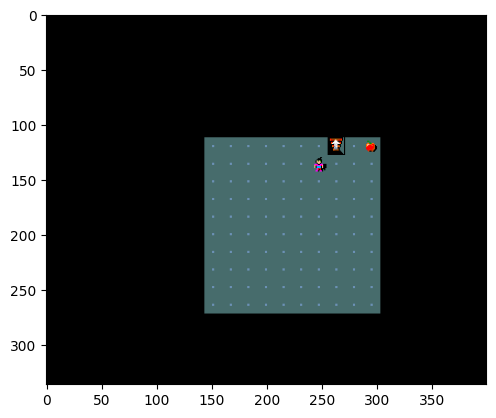

In [11]:
import level_generator
import gym
import matplotlib.pyplot as plt
import a_star
from pyswip import Prolog
import time
import IPython.display as display

des_file = level_generator.create_level(width=10,height=10,num_cloud=0)

kb = Prolog()
env = gym.make('MiniHack-Skill-Custom-v0',
               character="sam-hum-neu-mal",
               observation_keys=('screen_descriptions','inv_strs','blstats','message','pixel'),
               des_file=des_file)

obs = env.reset()
player_pos = (obs['blstats'][0], obs['blstats'][1])
print(player_pos)
states = []
states.append(obs['pixel'][:,400:800])

image = plt.imshow(obs['pixel'][:,400:800])

action_id = 0
diff_x = 1
diff_y = -1
#northeast
if diff_x == -1 and diff_y == 1: action_id = 4
#north
elif diff_x == 0 and diff_y == 1: action_id = 0
#northwest
elif diff_x == -1 and diff_y == -1: action_id = 7
#west
elif diff_x == 1 and diff_y == 0: action_id = 3
#east
elif diff_x == -1 and diff_y == 0: action_id = 1
#southwest
elif diff_x == 1 and diff_y == -1: action_id = 6
#south
elif diff_x == 0 and diff_y == -1: action_id = 2
#southeast
elif diff_x == -1 and diff_y == -1: action_id = 5

obs,_,_,_ = env.step(action_id)
player_pos = (obs['blstats'][0], obs['blstats'][1])
print(f'player pos: {player_pos}')
states.append(obs['pixel'][:,400:800])

for state in states:
    time.sleep(0.5)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(state)
time.sleep(0.5)
display.display(plt.gcf())
display.clear_output(wait=True)
